## 06. 통계량 검정 - more than 3samples
- 모수 : ANOVA
- 비모수 : kruskal-walis test

### 06-1. ANOVA(분산분석)

![image](https://user-images.githubusercontent.com/80219821/131296259-5cbc7143-66f0-4fa9-85da-e89c53ad2d07.png)

#### 06-1-1. One-way ANOVA (일원배치 분산분석)
- 하나의 범주형 변수의 영향을 알아보기 위해 사용
- 모집단의 수는 제한 없으며, 각 표본의 수는 달라도 된다. 
- 가정
    - 각 집단의 측정치는 서로 독립적이며, 정규분포를 따른다.
    - 각 집단 측정치의 분산은 값다. (등분산)
- 가설
    - 귀무가설 : k집단간 모평균에는 차이가 없음
    - 대립가설 : k집단간 모평균에는 차이가 있음

In [9]:
# 데이터 불러오기

import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/wjddyd66/R/master/Data/three_sample.csv")
print(data.head())
print(data.describe())

   no  method  survey  score
0   1       1       1     72
1   2       3       1     87
2   3       2       1     78
3   4       1       1     54
4   5       2       0     84
            no     method     survey       score
count  80.0000  80.000000  80.000000   80.000000
mean   40.5000   1.962500   0.650000   78.212500
std    23.2379   0.802587   0.479979   64.886404
min     1.0000   1.000000   0.000000   33.000000
25%    20.7500   1.000000   0.000000   58.000000
50%    40.5000   2.000000   1.000000   65.000000
75%    60.2500   3.000000   1.000000   79.500000
max    80.0000   3.000000   1.000000  500.000000


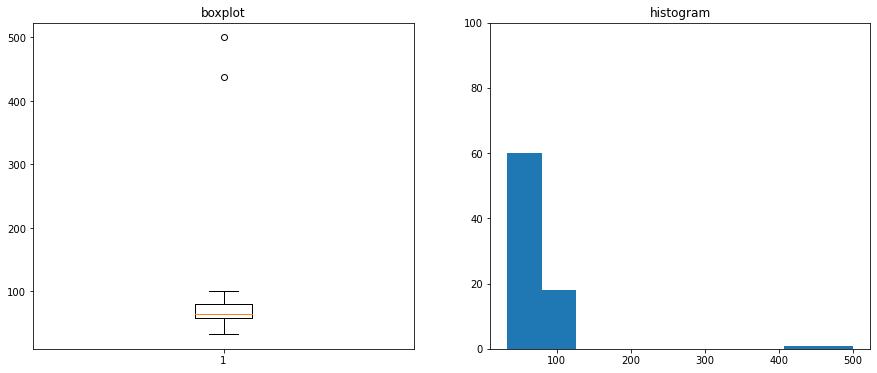

In [10]:
# 시각화로 데이터 확인 => 이상치 존재

import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].boxplot(data.score)
ax[0].set_title('boxplot')
ax[1].hist(data.score)
ax[1].set_ylim(0,100)
ax[1].set_title('histogram')
plt.show()

80
78


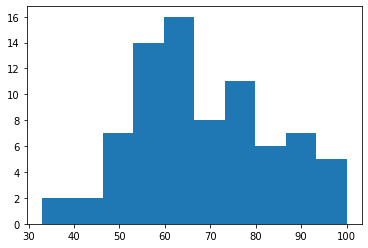

In [11]:
# 이상치 제거
print(len(data))
data = data.query("score <= 100")
print(len(data))
plt.hist(data.score)
plt.show()

In [18]:
# 정규성 확인

from scipy.stats import shapiro

print(shapiro(data[data['method']==1].score))
print(shapiro(data[data['method']==2].score))
print(shapiro(data[data['method']==3].score))

ShapiroResult(statistic=0.9447869658470154, pvalue=0.1746741086244583)
ShapiroResult(statistic=0.9591007232666016, pvalue=0.33189886808395386)
ShapiroResult(statistic=0.9333066940307617, pvalue=0.1155870258808136)


In [14]:
# 각 종속변수 데이터들의 등분산성 확인

import numpy as np
from scipy.stats import bartlett, levene

data_method1 = np.array(data[data['method']==1].score)
data_method2 = np.array(data[data['method']==2].score)
data_method3 = np.array(data[data['method']==3].score)

bartlett(data_method1,data_method2,data_method3)

BartlettResult(statistic=3.760993476436484, pvalue=0.15251432724222921)

In [28]:
# ANOVA 분석

from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf

reg = smf.ols("data['score']~ C(data['method'])",data=data).fit()
result = anova_lm(reg)

print(result)
print('-'*90)
print(np.mean(data[data['method']==1].score))
print(np.mean(data[data['method']==2].score))
print(np.mean(data[data['method']==3].score))

                     df        sum_sq     mean_sq         F    PR(>F)
C(data['method'])   2.0     28.907967   14.453984  0.062312  0.939639
Residual           75.0  17397.207418  231.962766       NaN       NaN
------------------------------------------------------------------------------------------
67.38461538461539
68.35714285714286
68.875


=> p-value가 0.05 보다 크므로 귀무가설을 기각하지 못한다.

즉, 평균은 서로 같다고 볼 수 있다.

---

#### 06-1-2. two-way ANOVA (이원배치 분산분석)
- 종속변수에 대해 두개의 범주형 변수 A,B의 영향을 알아보기 위해 사용
- 두 독립변수 A,B 사이에 상관관계가 있는지를 살펴보는 교호작용에 대한 검증이 필요
- 가정
    - 각 집단 측정치의 분포는 정규분포이며, 분산은 같다(등분산성)
- 주효과와 교호작용 효과에 대한 검정 수행
    - 주효과 : 독립변수가 종속변수에 미치는 효과
    - 교호작용효과 : 여러 독립변수의 조합이 종속변수에 주는 효과
- 가설
    - 귀무가설 : a와 b 변수에 따른 종속변수의 값에 차이 없음. a와 b 변수의 상호작용 효과가 없음
    - 대립가설 : a와 b 변수에 따른 종속변수의 값에 차이 있음. a와 b 변수의 상호작용 효과가 있음

In [29]:
# 데이터 불러와서, 변수 3개 뽑아내기 (독립2, 종속1)

mtcars = pd.read_csv('https://t1.daumcdn.net/cfile/blog/99F8633E5E8ECB130D?download' ,index_col=0)

mtcars_sam = mtcars.loc[:,['cyl','am','mpg']]
mtcars_sam.head()

,cyl,am,mpg
Mazda RX4,6,1,21.0
Mazda RX4 Wag,6,1,21.0
Datsun 710,4,1,22.8
Hornet 4 Drive,6,0,21.4
Hornet Sportabout,8,0,18.7


In [31]:
# 이원배치 분산분석

from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf

formula = 'mpg~ C(cyl) + C(am) + C(cyl):C(am)'
lm = smf.ols(formula, data=mtcars_sam).fit()
anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(cyl),2.0,824.784590,412.392295,44.851657,3.725274e-09
C(am),1.0,36.766919,36.766919,3.998759,5.608373e-02
C(cyl):C(am),2.0,25.436511,12.718256,1.383233,2.686140e-01
Residual,26.0,239.059167,9.194583,NaN,NaN


=> cyl 변수의 p-value는 0.05보다 작다. 즉, cyl(실린더개수)에 따른 주행거리간 차이가 존재하지 않는다는 귀무가설을 기각한다.

=> am 변수의 p-value는 0.05보다 크다. 즉, am(변속기종류)에 따른 주행거리간 차이가 존재하지 않는다.

=> cyl:am(교호작용)dml p-valusms 0.05보다 작다. 즉, cyl과 am의 종류간에는 교호작용이 존재하지 않는다.(상관관계 없음)

### @ 독립변수가 3개인 다원배치 분산분석도 마찬가지 방법으로 진행하면 된다!

#### 06-1-3. 사후검정
- 분산분석때 귀무가설이 기각되어서 세 변수의 평균이 같지 않다는 결론이 나온 데이터가 있다고 할 때 사용
- 그때는 사후검정을 통해 어떤 변수들의 관계가 귀무가설을 기각하게 되었는지 알 수 있다.

In [34]:
# 데이터 불러오기

url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = pd.read_csv(url, delimiter=',', header=None)

df = pd.DataFrame(data)
df.columns = ['value', 'treatment']
df.head()

,value,treatment
0,243,1
1,251,1
2,275,1
3,291,1
4,347,1


In [38]:
# 분산분석 (일원배치분산분석)
from statsmodels.stats.anova import anova_lm
import statsmodels.formula.api as smf

reg = smf.ols("data['value']~ C(data['treatment'])",data=data).fit()
result = anova_lm(reg)
result

,df,sum_sq,mean_sq,F,PR(>F)
C(data['treatment']),2.0,15515.766414,7757.883207,3.711336,0.043589
Residual,19.0,39716.097222,2090.320906,NaN,NaN


=> p-value가 0.05보다 작음으로 귀무가설이 기각된다.

즉, k 집단 간 모평균이 모두 같다고 할 수 없다.

In [36]:
# 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(df['value'], df['treatment'], alpha=0.05)

print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper  reject
------------------------------------------------------
     1      2 -60.1806 0.0354 -116.6056 -3.7555   True
     1      3  -38.625 0.3217 -104.8246 27.5746  False
     2      3  21.5556 0.6706  -43.2141 86.3252  False
------------------------------------------------------


=> 귀무가설이 기각된 2개의 집단 (1,2)의 평균이 다르다는 것을 확인할 수 있다.

#### 06-1-4. 이항검정
- t검정이나 ANOVA는 모두 분포의 평균을 비교하는 가설검정이다. 그러나 만약 범주가 2개로 구성된 자료의 경우 이항검정을 사용해야 한다.
    - 예) 성공 or 실패의 범주로 나뉜 경우

In [39]:
# scipy의 binom_test 활용

from scipy.stats import binom_test

pval = binom_test(520, n=1000, p=0.5)
print(pval)

0.21744829320424017


=> pval의 뜻은 1000번 시도해서 520번 성공했을 때, 기대성공확률이 0.5라고 하는 것이다.

=> p-value가 0.05보다 작으면 귀무가설 "실제성공확률은 기대성공확률과 같다"를 기각할 수 있다.

즉, 귀무가설을 기각하지 함으로 실제성공확률과 기대성공확률이 같지않다고 할 수 없다.

::위에서 p-value가 큰 이유는 520/1000은 520과 비슷하기 때문이다.

---

### 06-2 Kruskal Wallis(비모수 검정)
- 3개 이상 집단의 중위값 검정

In [41]:
# 데이터 불러오기

url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = pd.read_csv(url, delimiter=',', header=None)
data

,0,1
0,243,1
1,251,1
2,275,1
3,291,1
4,347,1
5,354,1
6,380,1
7,392,1
8,206,2
9,210,2


In [43]:
# 그룹 나누고 중위값 확인
group1 = data[data[1]==1]
group2 = data[data[1]==2]
group3 = data[data[1]==3]

print(np.median(group1))
print(np.median(group2))
print(np.median(group3))

122.0
104.0
122.0


In [44]:
# 비모수검정 (kruskal)

from scipy.stats import kruskal
kruskal(group1, group2, group3)

KruskalResult(statistic=148.8656364213711, pvalue=4.723215691129366e-33)

=> p-value가 0.05보다 작으므로 3개의 중위값이 모두 같다는 귀무가설을 기각한다.